# Basic Image Processing (Filters and Edges)
## Learn fundamental Image Operations.
### Objectives
- Load and display images with openCV.
- Convert to grayscale
- Apply blurring (Gaussian, median)
- Edge detection (Canny) and practice thresholding.
- How does filters and kernel operations affect images.


In [2]:
# load necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

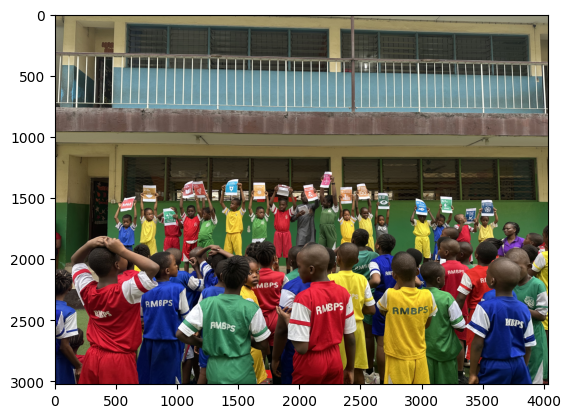

In [8]:
img = cv.imread('../data/pictures/pics/img_6.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [ ]:
# display the image using OpenCV
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

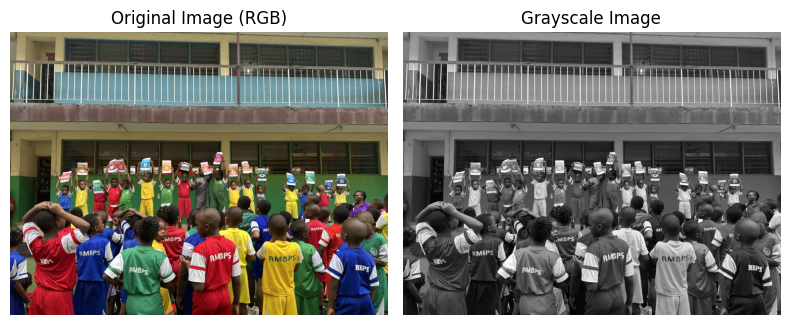

In [21]:
# Convert to RGB and Grayscale
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(8, 10))

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image (RGB)')
ax[0].axis('off')

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("Grayscale Image")
ax[1].axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


# Image Blurring Techniques

Image blurring is a technique used in image processing to reduce sharpness and detail making an image appear smoother. This is done by applying filters also called low-pass filters that reduce high-frequency noise and smooth finer details. Blurring is used for tasks like noise reduction, edge smoothing or creating artistic effects.

## Type of Blurring
- Gaussian Blurring
- Median Blurring
- Bilateral Blur

## Challenges of Image Blurring
- Loss of Detail
- Over-blurring
- Computational cost

## Gaussian Blurring
It works by applying a Gaussian function to an image, resulting in a smooth blur. It's useful for noise reduction and detail reduction in images. It is used as a processing step for ML and DL models.

This kernel helps in averaging the nearby pixel values with closer pixels having a higher weight, creating a natural-looking blur.

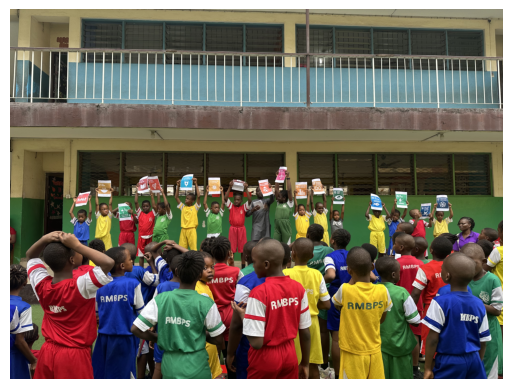

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_2 = cv.imread("../data/pictures/pics/img_6.jpg")
img_2_rgb = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
plt.imshow(img_2_rgb)
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(4031.5), np.float64(3023.5), np.float64(-0.5))

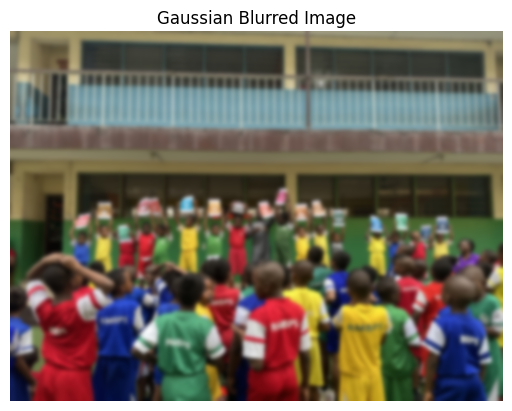

In [34]:
# Apply Gaussian blur
Gaussian = cv.GaussianBlur(img_2, (105, 105), 0)
Gaussian_rgb = cv.cvtColor(Gaussian, cv.COLOR_BGR2RGB)
plt.imshow(Gaussian_rgb)
plt.title("Gaussian Blurred Image")
plt.axis('off')


## Findings
`cv2.GaussianBlur(img, ksize, sigmaX[, dst[, sigmaY[, borderType]]])`

- img(numpy.ndarray): The input image (grayscale or color)
- ksize (width, height): Define the kernel (window) size
    - Must be odd numbers
    - Larger kernel -> stronger blur
    - Common values:
        - (3, 3) -> light blur
        - (5, 5) -> standard blur
        - (7, 7) or higher -> heavy blur
        - if set to (0, 0), OpenCV computes it automatically form sigmaX.
- sigmaX: Standard deviation of the Gaussian kernel in the X direction
    - float type
    - Larger value -> more blur
    - 0 -> auto-calculated from ksize
- dst (optional): Output image (rarely used explicitly)
    - numpy.ndarray
    - Usually omitted - OpenCV returns the output image.
- sigmaY (Optional): Standard deviation in the Y direction
    - if 0, OpenCV uses sigmaX
    - Useful for anisotropic blur
- borderType (optional): Controls how borders are handled


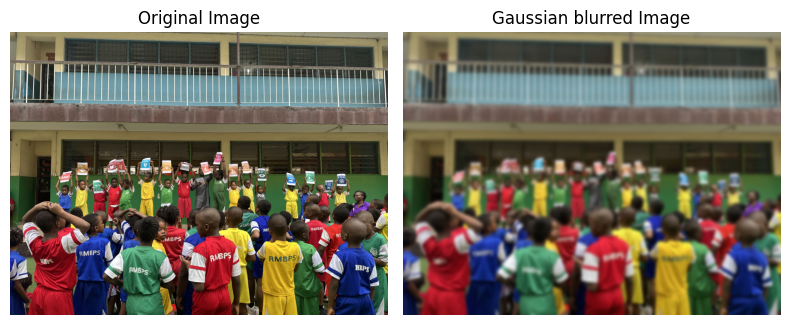

In [40]:
guassian = cv.GaussianBlur(img_2_rgb, (5, 5), 0)
guassian_rgb = cv.cvtColor(guassian, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(8, 10))

ax[0].imshow(img_2_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(Gaussian_rgb)
ax[1].set_title("Gaussian blurred Image")
ax[1].axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

## Median Blur
It is a non-linear filter which means it doesn't average the pixel values. Instead, it replaces each pixel with the median value of its neighboring pixels. This technique is useful for removing salt-and-pepper noise (random black and white pixels) while keeping the edges intact.

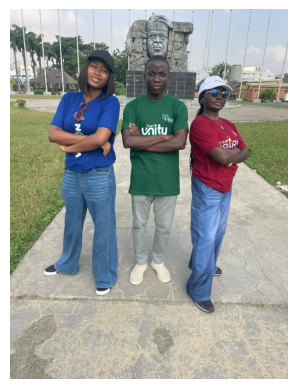

In [47]:
img_3 = cv.imread("../data/pictures/pics/img_n_30.jpg")
img_3_rgb = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
plt.imshow(img_3_rgb)
plt.axis('off')
plt.show()

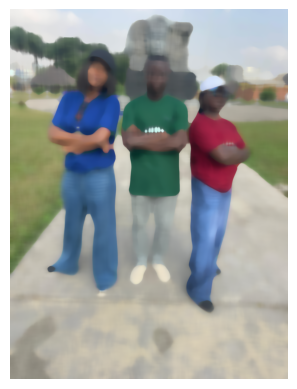

In [52]:
# medain blur
median = cv.medianBlur(img_3, 55)
median_rgb = cv.cvtColor(median, cv.COLOR_BGR2RGB)
plt.imshow(median_rgb)
plt.axis('off')
plt.show()

## Findings
`cv2.medianBlur(img, ksize)`

- img (numpy.ndarray): The input image (grayscale or color)
    - Can be 1-channel or multi-channel
    - Image depth must be uint8, uint16, or float32
- ksize: Define the aperture size of the filter
    - Must be odd and > 1
    - Common values:
        - 3 -> light noise removal
        - 5 -> standard
        - 7 or 9 -> strong filtering
        - ksize = 1 -> no effect

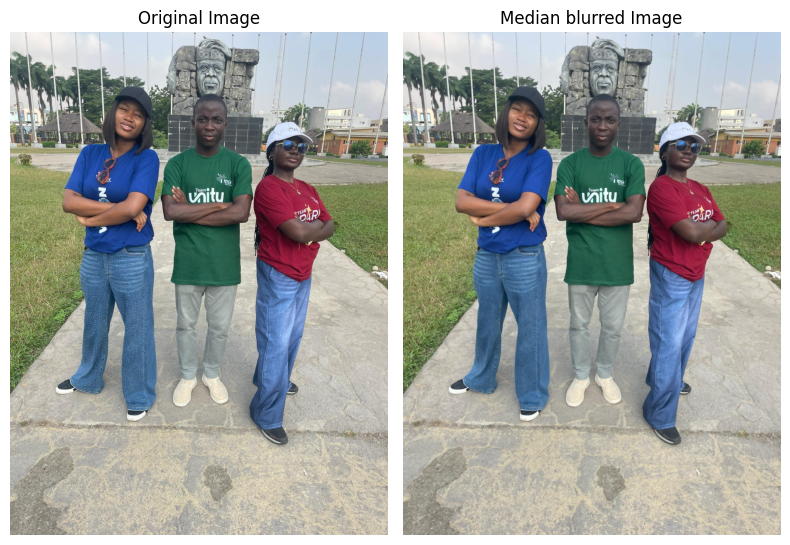

In [57]:
median_img = cv.medianBlur(img_3_rgb, 5)

fig, ax = plt.subplots(1, 2, figsize=(8, 10))

ax[0].imshow(img_3_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(median_img)
ax[1].set_title("Median blurred Image")
ax[1].axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

## Bilateral Blur
It's a more advanced techique that smooths the image while preserving edges. It calculates a weighted average based on both the spatial distance and the pixel intensity. This means that it will blur areas with similar colors and preserves sharp edges, making it useful for noise reduction without sacrificing important details.

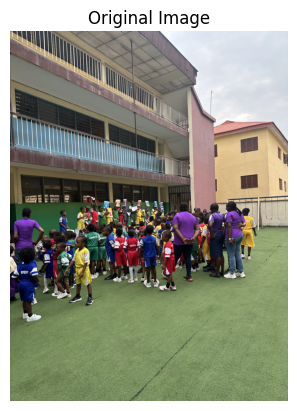

In [4]:
img_4 = cv.imread('../data/pictures/pics/img_34.jpg')
img_4_rgb = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)

plt.imshow(img_4_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()


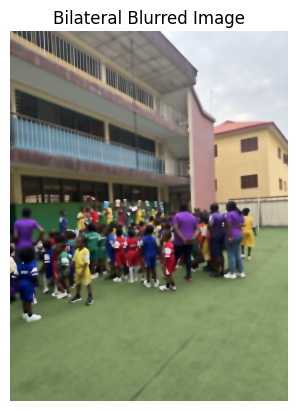

In [7]:
# Bilateral Blur
bilateral = cv.bilateralFilter(img_4_rgb, 45, 250, 250)

plt.imshow(bilateral)
plt.title('Bilateral Blurred Image')
plt.axis('off')
plt.show()

## Findings
`cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace[, dst[, borderType]])`

- img (numpy.ndarray): Input image (grayscale or color)
- d (int): Diameter of the pixel neighborhood
    - Larger d -> more smoothing
    - d = -1 -> computed automatically from sigmaSpace
    - Think of this as kernel size, but circular.
- sigmaColor (float): Controls intensity similarity
    - Larger -> more colors mixed
    - Smaller -> only very similar colors are blended
    - This what preserves edges.
- sigmaSpace (float): Controls spatial distance.
    - Larger -> farther pixels influence each other
    - smaller -> only nearby pixels affect smoothing
- dst (optional): Output image (almost always omitted)
- borderType (optional): Same border options as Gaussian blur

### How Bilateral Filtering Works (Intuition)
Each pixel is averaged using:
- Spatial closeness (like Gaussian blur)
- Color similarity (this preserves edges)
So pixels across an edge do not mix, unlike Gaussian blur.

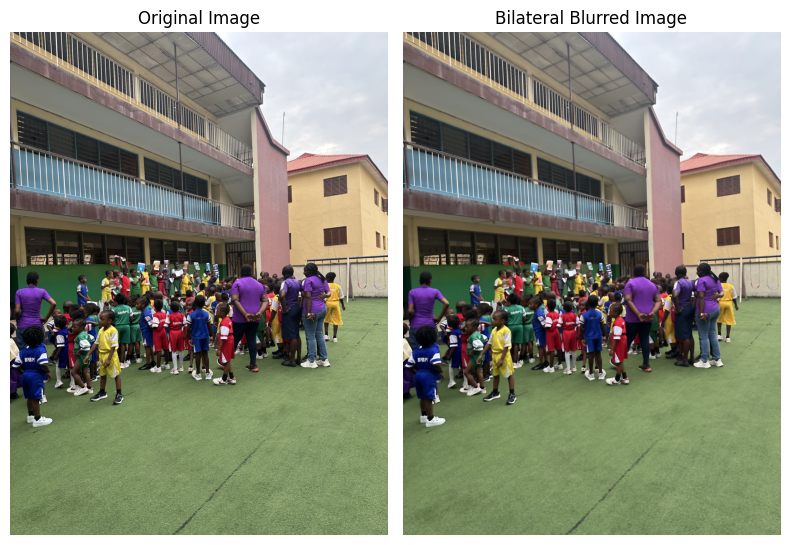

In [8]:
bilateral_img = cv.bilateralFilter(img_4_rgb, 15, 150, 150)

fig, ax = plt.subplots(1, 2, figsize=(8, 10))

ax[0].imshow(img_4_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(bilateral_img)
ax[1].set_title("Bilateral Blurred Image")
ax[1].axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

| Filter    | Preserves Edges | Noise Type          | Speed     |
| --------- | --------------- | ------------------- | --------- |
| Gaussian  | ❌               | Gaussian            | ⚡ Fast    |
| Median    | ✅               | Salt & pepper       | ⚡⚡ Medium |
| Bilateral | ✅✅              | Gaussian + textures | 🐢 Slow   |


# Edge detection
`Edge detection` is a crucial technique in image processing and computer vision, used to identify sharp changes in brightness that typically signify object boundaries, edges, lines, or textures. It enables applications like object recognition, image segmentation, and tracking by highlighting the structural features of an image. 

## Most used/popular edge detection methods
- Sobel
- Laplacian
- Canny

## Understanding Edges in Images
An edge in an image represents a boundary where there is a significant change in intensity or color. Edge detection is crucial for understanding the structure and features within an image, aiding in tasks like object recognition, segmentation and tracking. Edges are typically detected by identifying areas with high intensity gradients, which can be achieved using various operators that compute derivatives of the images intensity function.

Edges are boundaries between different regions in an image. Thes are typically caused by:
- Object boundaries
- Surface orientation changes
- Texture changes
- Lighting variations


`NOTE`: Color images are often coverted to grayscale before applying edge detection techniques like Canny, Sobel, or Laplacian. This simplifies the process by reducing the image to a single intensity channel, making it easier to detect edges based on intensity changes. Once converted to grayscale, these algorithms can effectively highlight the edges in the image.

## Sobel Operator
It's a discrete differentiation operator that computes an approximation of the gradient of the image intensity function. It emphasizes edge detection in both borizontal and vertical directions by combining Gaussian smoothing and differentiation, making it less sensitive to noise.
### Mathematical Formulation
The Sobel operator uses two 3x3 kernels:
- Gx (horizontal changes):
$$
G_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$
- Gy (vertical changes):
$$
G_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

The gradient magnitude is computed as:

$$
G = \sqrt{G_x^2 + G_y^2}
$$

or an approximation:
$$
G \approx |G_x| + |G_y|
$$

When the Sobel kernel is applied to a region of the image, it performs a convolution operation that emphasizes regions with high spatial frequency, which correspond to edges. For example, applying the Gx kernel will highlight vertical edges, while Gy will highlight horizontal edges.

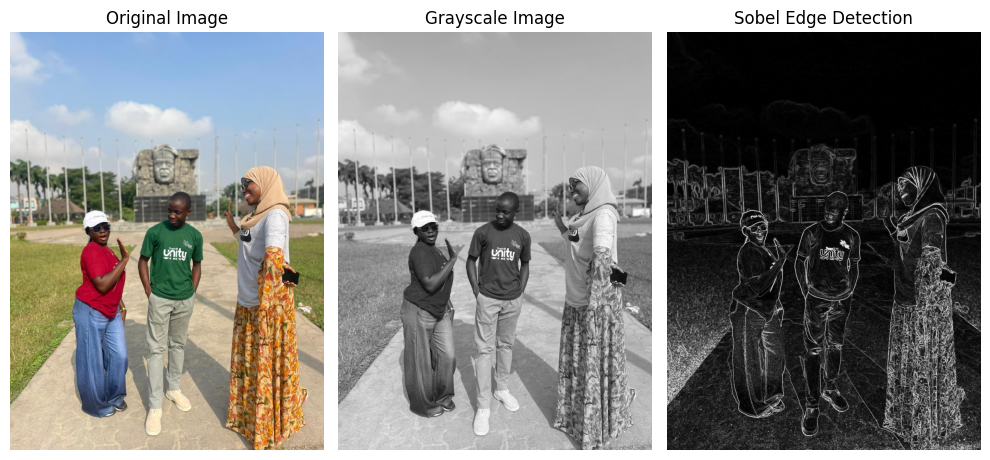

In [28]:
# Load images
img_5_rgb = cv.imread('../data/pictures/pics/img_n_38.jpg', cv.IMREAD_COLOR_RGB)
img_5_gray = cv.imread('../data/pictures/pics/img_n_38.jpg', cv.IMREAD_GRAYSCALE)

# Apply sobel operator
sobelx = cv.Sobel(img_5_gray, cv.CV_64F, 1, 0, ksize=3) # Horizontal edges
sobely = cv.Sobel(img_5_gray, cv.CV_64F, 0, 1, ksize=3) # Vertical edges

# Compute gradient magnitude
gradient_magnitude = cv.magnitude(sobelx, sobely)

# convert to uint8
gradient_magnitude = cv.convertScaleAbs(gradient_magnitude)

# Display images
fig, ax = plt.subplots(1, 3, figsize=(10, 10))


ax[0].imshow(img_5_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(img_5_gray, cmap='gray')
ax[1].set_title("Grayscale Image")
ax[1].axis('off')

ax[2].imshow(gradient_magnitude, cmap="gray")
ax[2].set_title("Sobel Edge Detection")
ax[2].axis('off')


plt.tight_layout()
plt.show()


## Findings
`cv2.Sobel(src, ddepth, dx, dy, ksize=3)`
- src (numpy.ndarray): image
    - Grayscale is recommended (but color works per channel)
    - Usually `uint8`
- ddepth: OpenCV depth constant
    - Specifies the output image depth.
    - Gradient can be negative
    - `uint8` cannot represent negative values
    - `CV_64F` preserves full precision
- dx (int): Order of derivative in the x-direction 
- dy (int): Order of derivative in the y-direction

### dx & dy Meaning (Very Important)
| dx | dy | Result                    |
| -- | -- | ------------------------- |
| 1  | 0  | (G_x) → vertical edges    |
| 0  | 1  | (G_y) → horizontal edges  |
| 1  | 1  | mixed / diagonal          |
| 2  | 0  | second-order x derivative |

- ksize (optional, default = 3): Size of the Sobel kernel
    - type int (odd number)
    - Must be odd: `1, 3, 5, 7`
    - Larger -> smoother gradients, thicker edges
    - `ksize = 1` uses the classic 3x3 Sobel kernel internally 


## Laplacian Operator
The Laplacian operator is a second-order derivative operator that highlights regions of rapid intensity change, effective in edge detection. Unlike Sobel, which is directional, the Laplacian is non-directional and detects edges in all directions.

### Mathematical Formulation
The Laplacian operator is defined as:
$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$
Common kernels:
- 4-neighbor kernel:
$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$
- 8-neighbor kernel:
$$
\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

The laplacian operator is a differential operator used in mathematics and physics to calculate the second spatial derivative of a scalar function. It essentially measures the rate of changes of a function across its spatial domain. In simpler terms, it indicates how much the function's value deviates from the average value of its surrounding points.

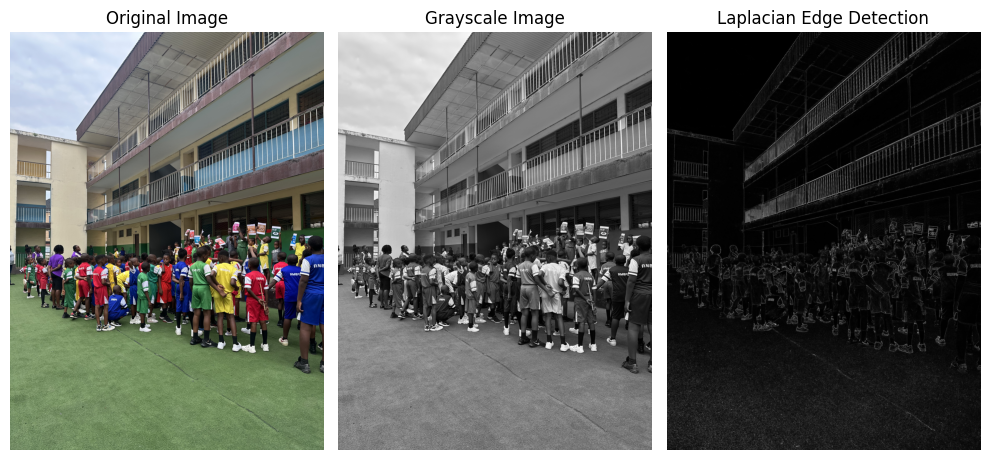

In [27]:
# Load images
img_6_rgb = cv.imread('../data/pictures/pics/img_29.jpg', cv.IMREAD_COLOR_RGB)
img_6_gray = cv.imread('../data/pictures/pics/img_29.jpg', cv.IMREAD_GRAYSCALE)

# Apply Laplacian operator
laplacian = cv.Laplacian(img_6_gray, cv.CV_64F)

# Convert to uint8
laplacian_abs = cv.convertScaleAbs(laplacian)

# Display images
fig, ax = plt.subplots(1, 3, figsize=(10, 10))


ax[0].imshow(img_6_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(img_6_gray, cmap='gray')
ax[1].set_title("Grayscale Image")
ax[1].axis('off')

ax[2].imshow(laplacian_abs, cmap="gray")
ax[2].set_title("Laplacian Edge Detection")
ax[2].axis('off')


plt.tight_layout()
plt.show()

## Findings
The Laplacian operator is applied, which calculates the second-order derivative of the image to detect areas where the intensity changes rapidly in any direction—these areas correspond to edges. Since the Laplacian output includes negative values (indicating direction of change), it's converted to an absolute 8-bit format using convertScaleAbs to make it visually displayable.

`laplacian = cv2.Laplacian(src, ddepth, ksize=3)`

- src (numpy.ndarray): image
    - Usually converted to grayscale first
    - Can be uint8, but output depth matters
- ddepth (OpenCV depth constant): Specifies the output image depth.
    - Laplacian produces negative values
    - uint8 cannot represent negative
    - Using CV_64F preserves full information
- ksize (optional, default = 3)
    - Must be odd: `1, 3, 5, 7`
    - Larger kernel -> smoother response, thicker edges
    - `ksize = 1` uses the simplest 3x3 Laplacian kernel

## Canny Edge Detector
It combines gradient-based edge detection with advanced logic to ensure that the detected edges are thin, connected, and free from noise. Canny Edge detection is one of the most popular edge-detection methods in use today because it is so robust and flexible. The algorithm itself follows a three-stage process for extracting edges from an image. Add to it image blurring, a necessary preprocessing step to reduce noise. This makes it a four-stage process, which includes:

1. Noise Reduction: Raw image pixels can often lead to noisy edges, so it is essential to reduce noise before computing edges in Canny Edge Detection, a Gaussian blur filter is used to essentially remove or minimize unnecessary detail that could lead to undesirable edges.


2. Calculating the intensity gradient of the image: Once the image has been smoothed (blurred), it is filtered with a Sobel kernel, both horizontally and vertically. The results from these filtering operations are then used to calculate both the intensity gradient magnitude, and the direction for each pixel. The gradient direction is then rounded to the nearest 45-degree angle.


3. Suppression of False edges: After reducing noise and calculating the intensity gradient, the next step uses a technique called non-maximum suppression of edges to filter out unwanted pixels (which may not actually constitute an edge). To accomplish this, each pixel is compared to its neighboring pixels in the positive and negative gradient direction. if the gradient magnitude of the current pixel is greater than its neighboring pixels, it is left unchanged. Otherwise, the magnitude of the current pixel is set to zero.


4. Hysteresis Thresholding: In this final step of canny edge detection, the gradient magnitudes are compared with two threshold values, one smaller than the other.
    - if the gradient magnitude value is higher than the larger threshold value, those pixels are associated with solid edges and are included in the final edge map.

    - if the gradient magnitude values are lower than the smaller threshold value, the pixels are suppressed and excluded from the final edge map.

    - All the other pixels, whose gradient magnitudes fall between these two thresholds, are marked as 'weak' edges (i.e. they become candidates for being included in the final edge map).

    - If the 'weak' pixels are connected to those associated with solid edges, they are also included in the final edge map.

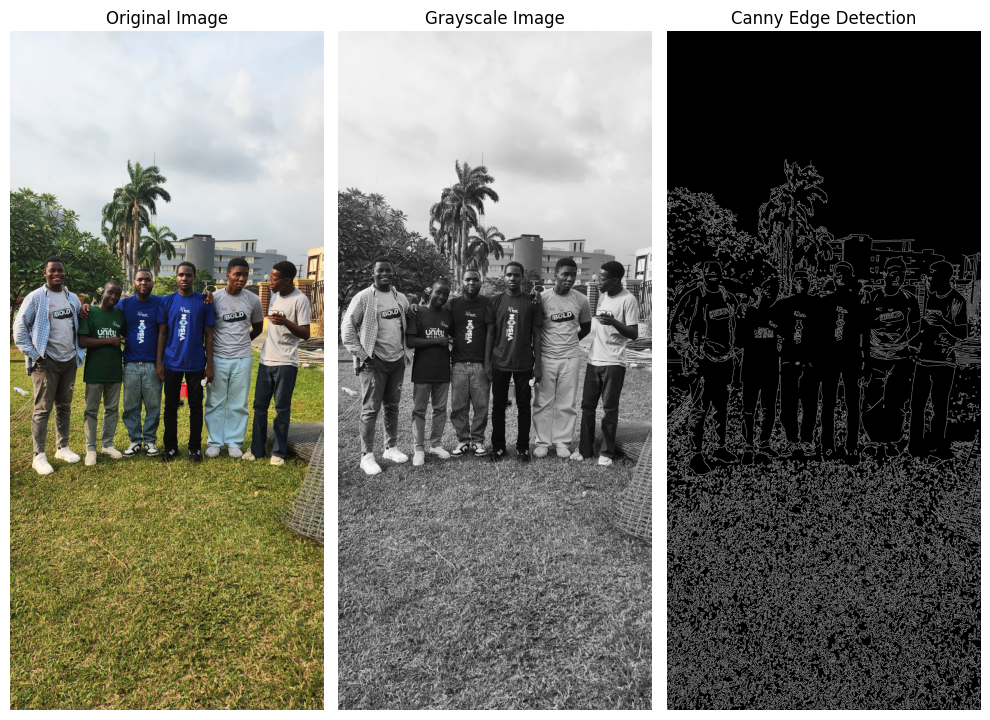

In [34]:
# Load images
img_7_rgb = cv.imread('../data/pictures/pics/img_n_46.jpg', cv.IMREAD_COLOR_RGB)
img_7_gray = cv.imread('../data/pictures/pics/img_n_46.jpg', cv.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blur = cv.GaussianBlur(img_7_gray, (5, 5), 1.4)

# Apply Canny Edge Detector
edges = cv.Canny(blur, threshold1=100, threshold2=200)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))

ax[0].imshow(img_7_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(img_7_gray, cmap='gray')
ax[1].set_title("Grayscale Image")
ax[1].axis('off')

ax[2].imshow(edges, cmap="gray")
ax[2].set_title("Canny Edge Detection")
ax[2].axis('off')


plt.tight_layout()
plt.show()

## Findings
`cv2.Canny(image, threshold1, threshold2)`
- image (numpy.ndarray): The input image
    - Must be grayscale (single channel)
    - Type usually uint8
    - If you pass a color image, OpenCV will not convert it automatically
- threshold1 (int or float): The lower hysteresis threshold
    - Weak edges below this value -> discarded
    - Values between `threshold1` and `threshold2` -> kept only if connected to strong edges.
- threshold2 (int or float): The upper hysteresis threshold.
    - Strong >= threshold2 -> kept
    - Must be greater than threshold1

### Choosing Good Thresholds
A common heuristic:
`threshold2 = 2 * threshold1`
Examples:
- (50, 150) -> sensitive
- (100, 200) -> balanced
- (150, 300) -> strong edges only

| Method    | Output            | Robustness |
| --------- | ----------------- | ---------- |
| Sobel     | Gradient image    | Medium     |
| Laplacian | Second derivative | Low        |
| Canny     | Binary edges      | High ✅     |
